In [10]:
# Importing the numpy and qiskit modules

import numpy as np
from qiskit import *
from math import *
from qiskit.extensions import Initialize
from qiskit.visualization import plot_bloch_multivector, array_to_latex

In [11]:
# Creating two registers for storing classical bits generated after the measurement

b1 = ClassicalRegister(1,"b1")
b2 = ClassicalRegister(1,"b2")

# Creating an instance of a Quantum Circuit with 3 qubits

C = QuantumCircuit(QuantumRegister(3,"qubit"),b1,b2)

<IPython.core.display.Latex object>

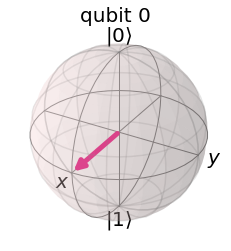

In [12]:
# Generating phi

psi = [1/sqrt(2) +0.0j, 1/sqrt(2)+0.0j]

display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
plot_bloch_multivector(psi)

In [13]:
# Initializing psi

psi_Initialize = Initialize(psi)
C.append(psi_Initialize,[0])

C.barrier()

In [14]:
# Creating a bell state

C.h(1)
C.cx(1,2)

C.barrier()

In [15]:
# Adding a CNOT gate with the 1st qubit as the control qubit and the 2nd qubit as target qubit 
# And then adding a Hadamard gate to the 1st qubit

C.cx(0,1)
C.h(0)

C.barrier()

In [16]:
# Measuring the 1st and 2nd qubit

C.measure(0,b1)
C.measure(1,b2)

C.barrier()

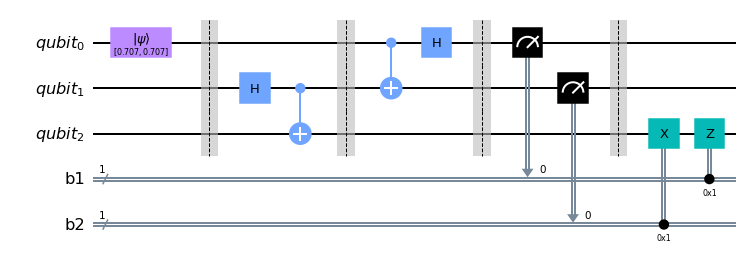

In [17]:
# Applying appropriate gates to get back psi

C.x(2).c_if(b2, 1)
C.z(2).c_if(b1, 1)

C.draw()

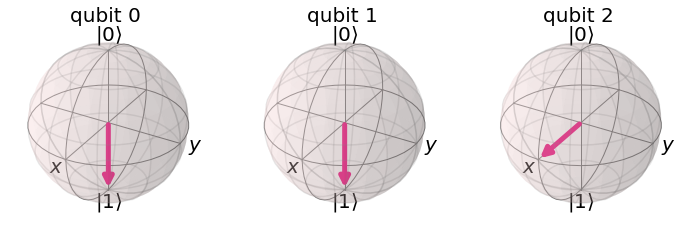

In [18]:
# Simulating the circuit

Simulator = Aer.get_backend('aer_simulator')

C.save_statevector()

Sim_Instance = Simulator.run(C)
Sim_Result = Sim_Instance.result()

output = Sim_Result.get_statevector()

plot_bloch_multivector(output)